In [56]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np 
import pandas as pd 
import plotly.graph_objects as go
import time
import os
import pickle

from my_lib.utility import *
from plotly.subplots import make_subplots
from openpyxl import load_workbook
from openpyxl.styles import PatternFill

Contenedor:
* Dimensiones: $12m \times 2m$

Cajas:
* Caja 1: $2m \times 0.8m$
* Caja 2: $3m \times 0.8m$
* Caja 3: $5m \times 0.8m$
* Caja 4: $6m \times 0.8m$
* Caja 5: $8m \times 0.8m$

## Visualización de las cajas en 2D

In [57]:
contenedor_dim = [12,2]

dimensiones_cajas = [
    (2, 0.8),  # Caja 1
    (3, 0.8),  # Caja 2
    (5, 0.8),  # Caja 3
    (6, 0.8),   # Caja 4
    (8, 0.8)   # Caja 5
]

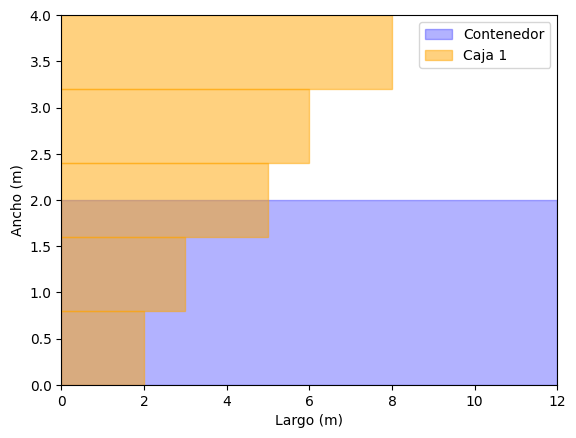

In [ ]:
fig, ax = plt.subplots()
# Contenedor
rect_contenedor = plt.Rectangle((0, 0), contenedor_dim[0], contenedor_dim[1], color='blue', alpha=0.3, label='Contenedor')
ax.add_patch(rect_contenedor)

# cajas
y_offset = 0
for i, caja in enumerate(dimensiones_cajas):
    rect_caja = plt.Rectangle((0, y_offset), caja[0], caja[1], color='orange', alpha=0.5, label=f'Caja {i+1}' if i == 0 else "")
    ax.add_patch(rect_caja)
    y_offset += caja[1]  # Sumar la altura de cada caja al desplazamiento

ax.set_xlim(0, contenedor_dim[0])
ax.set_ylim(0, sum([caja[1] for caja in dimensiones_cajas]))  # Sumar las alturas de las cajas para determinar el límite
ax.set_xlabel('Largo (m)')
ax.set_ylabel('Ancho (m)')
ax.legend()
plt.show()

## configuración de las cajas (input usuario)

In [59]:
def configuracion_cajas():
    """Permite al usuario definir la cantidad de cajas de cada tamaño."""
    # Número de cajas por tamaño (input del usuario)
    num_boxes = [0, 0, 0, 0, 0]  # Inicializa la lista para 5 tipos de cajas
    
    print("Introduce la cantidad de cada tipo de caja:")
    for i in range(5):  # Para 5 tipos de cajas
        while True:
            try:
                cantidad = int(input(f"Cantidad de cajas de tamaño {i + 1}: "))
                if cantidad >= 0:
                    num_boxes[i] = cantidad  # Almacena la cantidad en la posición correspondiente
                    break
                else:
                    print("Por favor, ingresa un número no negativo.")
            except ValueError:
                print("Por favor, ingresa un número entero.")
    
    return num_boxes

In [60]:

# Dimensiones de las cajas (largo x ancho)
box_sizes = [(2, 0.8), (3, 0.8), (5, 0.8), (6, 0.8), (8, 0.8)]

# Dimensiones del contenedor
container_width = 12
container_height = 2

# Número de cajas por tamaño (input del usuario)
num_boxes = configuracion_cajas()
print(num_boxes)

Introduce la cantidad de cada tipo de caja:
[4, 5, 3, 2, 2]


## Crear población incial 

In [79]:
# Función para crear una caja con posición aleatoria en el contenedor
def create_box(box_id, width, height):
    x = random.uniform(0, container_width - width)
    y = random.uniform(0, container_height - height)
    rotation = random.choice([0, 90])  # 0 para posición original, 90 para rotada
    # Retorna 'box_id', 'x','y' (posición),'rotación'
    return [box_id, x, y, rotation]

# Función para crear la población inicial
def initial_population(pop_size):
    population = []
    for _ in range(pop_size):
        individual = []
        for i, count in enumerate(num_boxes):
            for _ in range(count):
                width, height = box_sizes[i]
                # Considera rotación en la posición
                box = create_box(i + 1, width, height)
                individual.append(box)
        population.append(individual)
    return population


In [ ]:
# tamaño de la población = # de individuos = # contenedores
tam_pob = 10
# población inicial
population = initial_population(tam_pob)

In [85]:
population_matrix = np.array(population)
print(population_matrix)

[[[ 1.          8.9167084   0.6577244   0.        ]
  [ 1.          3.72299204  1.18389724 90.        ]
  [ 1.          5.47920866  1.11377407  0.        ]
  [ 1.          1.91821563  0.65002115  0.        ]
  [ 2.          3.75811346  0.56204239 90.        ]
  [ 2.          0.43690352  0.88106673  0.        ]
  [ 2.          0.43230481  0.06548037  0.        ]
  [ 2.          6.46246618  0.53273303  0.        ]
  [ 2.          8.99451436  0.41018064  0.        ]
  [ 3.          1.65867971  0.33460151 90.        ]
  [ 3.          5.71226266  0.51728451  0.        ]
  [ 3.          3.78794879  0.74448077 90.        ]
  [ 4.          4.86547392  0.39728296  0.        ]
  [ 4.          0.30951407  0.24870183  0.        ]
  [ 5.          1.09303642  0.551772   90.        ]
  [ 5.          3.74704616  0.95405271 90.        ]]

 [[ 1.          0.65618776  1.19153472  0.        ]
  [ 1.          4.10091672  0.62891954  0.        ]
  [ 1.          9.18141036  0.57044706 90.        ]
  [ 1.    

In [ ]:
for i, individual in enumerate(population):
    print(f"Individuo {i + 1} como matriz:")
    individual_matrix = np.array(individual)
    print(individual_matrix)
    print("\n")

Individuo 1 como matriz:
[[ 1.          8.9167084   0.6577244   0.        ]
 [ 1.          3.72299204  1.18389724 90.        ]
 [ 1.          5.47920866  1.11377407  0.        ]
 [ 1.          1.91821563  0.65002115  0.        ]
 [ 2.          3.75811346  0.56204239 90.        ]
 [ 2.          0.43690352  0.88106673  0.        ]
 [ 2.          0.43230481  0.06548037  0.        ]
 [ 2.          6.46246618  0.53273303  0.        ]
 [ 2.          8.99451436  0.41018064  0.        ]
 [ 3.          1.65867971  0.33460151 90.        ]
 [ 3.          5.71226266  0.51728451  0.        ]
 [ 3.          3.78794879  0.74448077 90.        ]
 [ 4.          4.86547392  0.39728296  0.        ]
 [ 4.          0.30951407  0.24870183  0.        ]
 [ 5.          1.09303642  0.551772   90.        ]
 [ 5.          3.74704616  0.95405271 90.        ]]


Individuo 2 como matriz:
[[ 1.          0.65618776  1.19153472  0.        ]
 [ 1.          4.10091672  0.62891954  0.        ]
 [ 1.          9.18141036  0.

In [83]:
# Python3 program to find number 
# of bins required using
# First Fit algorithm.

# Returns number of bins required 
# using first fit
# online algorithm
def firstFit(weight, n, c):
	
	# Initialize result (Count of bins)
	res = 0;

	# Create an array to store 
	# remaining space in bins
	# there can be at most n bins
	bin_rem = [0]*n;

	# Place items one by one
	for i in range(n):
		
		# Find the first bin that 
		# can accommodate
		# weight[i]
		j = 0;
		
		# Initialize minimum space 
		# left and index
		# of best bin
		min = c + 1;
		bi = 0;

		for j in range(res):
			if (bin_rem[j] >= weight[i] and bin_rem[j] -
									weight[i] < min):
				bi = j;
				min = bin_rem[j] - weight[i];
			
		# If no bin could accommodate weight[i],
		# create a new bin
		if (min == c + 1):
			bin_rem[res] = c - weight[i];
			res += 1;
		else: # Assign the item to best bin
			bin_rem[bi] -= weight[i];
	return res;

# Driver code
if __name__ == '__main__':
	weight = [ 2, 5, 4, 7, 1, 3, 8 ];
	c = 10;
	n = len(weight);
	print("Number of bins required in First Fit : ", 
							firstFit(weight, n, c));
	
# This code is contributed by Rajput-Ji

Number of bins required in First Fit :  4


In [84]:
# Python program to find number of bins required using
# First Fit Decreasing algorithm.

# Returns number of bins required using first fit
# online algorithm
def firstFit(weight, n, c):
	
	# Initialize result (Count of bins)
	res = 0
	
	# Create an array to store remaining space in bins
	# there can be at most n bins
	bin_rem = [0]*n
	
	# Place items one by one
	for i in range(n):
	
		# Find the first bin that can accommodate
		# weight[i]
		j = 0
		while( j < res):
			if (bin_rem[j] >= weight[i]):
				bin_rem[j] = bin_rem[j] - weight[i]
				break
			j+=1
			
		# If no bin could accommodate weight[i]
		if (j == res):
			bin_rem[res] = c - weight[i]
			res= res+1
	return res
	
# Returns number of bins required using first fit
# decreasing offline algorithm
def firstFitDec(weight, n, c):

	# First sort all weights in decreasing order
	weight.sort(reverse = True)

	# Now call first fit for sorted items
	return firstFit(weight, n, c)

# Driver program
weight = [ 2, 5, 4, 7, 1, 3, 8 ]
c = 10
n = len(weight)
print("Number of bins required in First Fit Decreasing : ",str(firstFitDec(weight, n, c)))

# This code is contributed by shinjanpatra


Number of bins required in First Fit Decreasing :  3
